In [16]:
import json
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

with open('Data/sarcasm.json', 'r') as f:
    datastore = json.load(f)

In [18]:
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0: training_size]
testing_labels = labels[training_size:]

In [19]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [20]:
word_index=tokenizer.word_index

In [21]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [24]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [25]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Train on 20000 samples, validate on 6709 samples
Epoch 1/50


W0905 02:02:52.577715 140689109051200 deprecation.py:323] From /opt/tljh/user/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


20000/20000 [==============================] - 25s 1ms/sample - loss: 0.4503 - accuracy: 0.7757 - val_loss: 0.3845 - val_accuracy: 0.8255
Epoch 2/50
20000/20000 [==============================] - 21s 1ms/sample - loss: 0.3511 - accuracy: 0.8403 - val_loss: 0.3818 - val_accuracy: 0.8216
Epoch 3/50
20000/20000 [==============================] - 21s 1ms/sample - loss: 0.3266 - accuracy: 0.8533 - val_loss: 0.3694 - val_accuracy: 0.8326
Epoch 4/50
20000/20000 [==============================] - 21s 1ms/sample - loss: 0.3116 - accuracy: 0.8597 - val_loss: 0.3731 - val_accuracy: 0.8319
Epoch 5/50
20000/20000 [==============================] - 21s 1ms/sample - loss: 0.3021 - accuracy: 0.8653 - val_loss: 0.3709 - val_accuracy: 0.8311
Epoch 6/50
20000/20000 [==============================] - 21s 1ms/sample - loss: 0.2934 - accuracy: 0.8691 - val_loss: 0.3820 - val_accuracy: 0.8346
Epoch 7/50
20000/20000 [==============================] - 21s 1ms/sample - loss: 0.2865 - accuracy: 0.8745 - val_loss

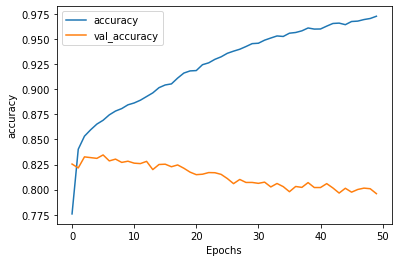

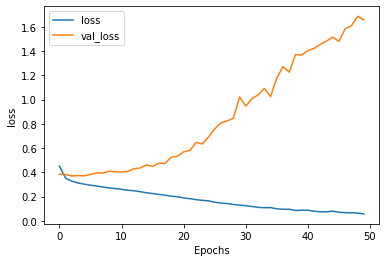

In [27]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, 'accuracy');
plot_graphs(history, 'loss');